<a href="https://colab.research.google.com/github/NsiriRoua/Computer_Vision/blob/main/Humans_vs_Horses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-03-17 19:29:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.217.164.144, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   179MB/s    in 0.8s    

2021-03-17 19:29:20 (179 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



**Let's unzip the data**

In [4]:
import os 
import zipfile
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [6]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

Now, let's see what the filenames look like in the horses and humans training directories

In [20]:
train_horse_names=os.listdir(train_horse_dir)
train_human_names=os.listdir(train_human_dir)
print(train_horces_names[:10])
print(train_humans_names[:10])

['horse36-7.png', 'horse26-8.png', 'horse30-5.png', 'horse35-1.png', 'horse14-6.png', 'horse21-7.png', 'horse02-9.png', 'horse13-6.png', 'horse48-8.png', 'horse11-8.png']
['human16-29.png', 'human13-07.png', 'human07-16.png', 'human05-27.png', 'human17-05.png', 'human11-00.png', 'human16-25.png', 'human04-09.png', 'human14-09.png', 'human04-23.png']


**So How many horses and humans , we have on our file ?**

In [11]:
print('the total number of horces is :{}'.format(len(os.listdir(train_horse_dir))))
print('the total number of humans is :{}'.format(len(os.listdir(train_human_dir))))

the total number of horces is :500
the total number of humans is :527


**Let's take a look at our pictures**

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

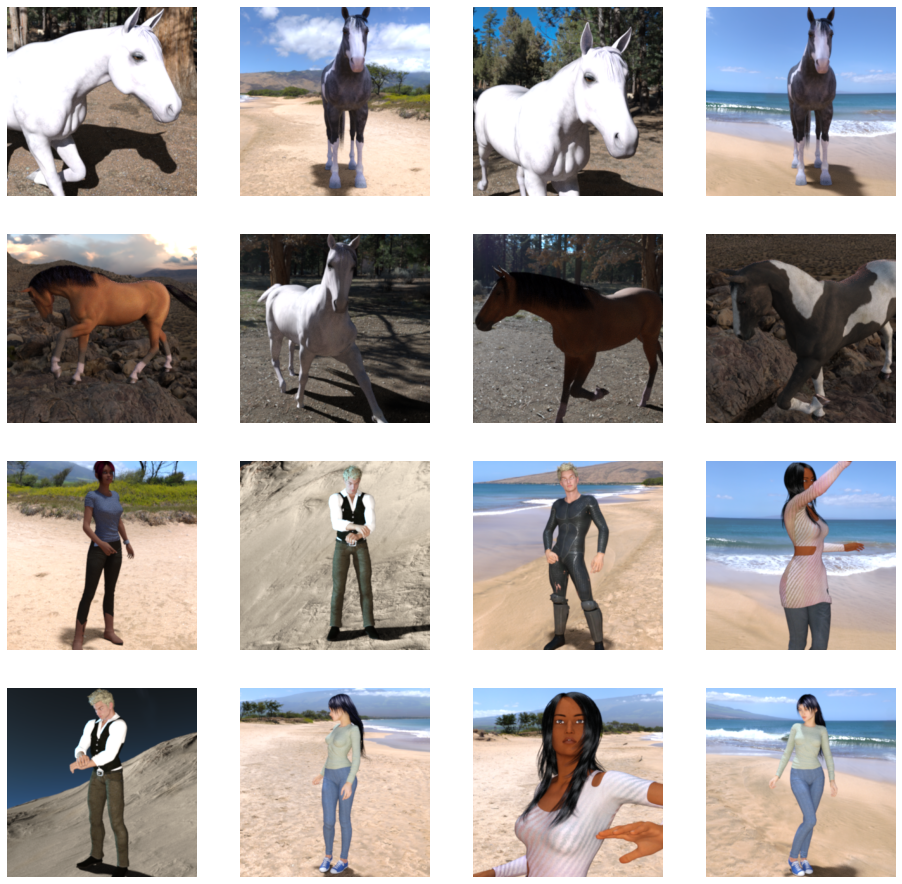

In [21]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# **Let's build a small model**

In [31]:
import tensorflow as tf 

In [28]:
model=tf.keras.models.Sequential([
                                 tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 tf.keras.layers.Dense(1,activation='sigmoid')
                                 
                                 

])

**Let's see the summary**

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

**Let's compile our NN**

In [38]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])



**Data Preprocessing**

Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen=ImageDataGenerator(rescale=1/255)
#Training images
train_generator=train_data_gen.flow_from_directory('/tmp/horse-or-human/',target_size=(300,300),batch_size=128,class_mode='binary')

Found 1027 images belonging to 2 classes.


**Training**

In [39]:
model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1)

Epoch 1/15
8/8 [==============================] - 40s 630ms/step - loss: 2.4864 - accuracy: 0.4902
Epoch 2/15
8/8 [==============================] - 6s 700ms/step - loss: 0.7397 - accuracy: 0.6929
Epoch 3/15
8/8 [==============================] - 6s 817ms/step - loss: 0.7900 - accuracy: 0.6071
Epoch 4/15
8/8 [==============================] - 6s 696ms/step - loss: 0.6807 - accuracy: 0.6274
Epoch 5/15
8/8 [==============================] - 6s 686ms/step - loss: 0.6701 - accuracy: 0.6205
Epoch 6/15
8/8 [==============================] - 6s 701ms/step - loss: 0.6630 - accuracy: 0.6700
Epoch 7/15
8/8 [==============================] - 6s 796ms/step - loss: 0.8162 - accuracy: 0.6867
Epoch 8/15
8/8 [==============================] - 6s 682ms/step - loss: 0.4991 - accuracy: 0.7960
Epoch 9/15
8/8 [==============================] - 6s 686ms/step - loss: 1.9203 - accuracy: 0.7943
Epoch 10/15
8/8 [==============================] - 6s 807ms/step - loss: 0.1995 - accuracy: 0.9190
Epoch 11/15
8/8 [=

**Let's run our model**

In [42]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

KeyboardInterrupt: ignored

**Let's visualize**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


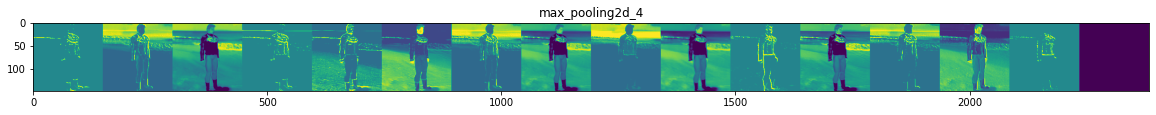

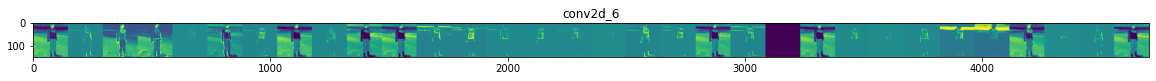

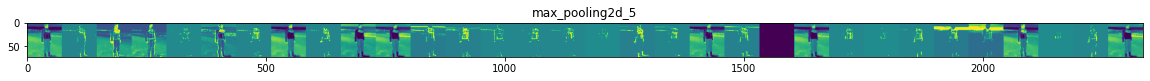

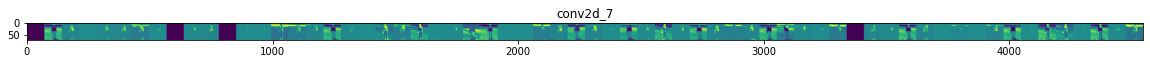

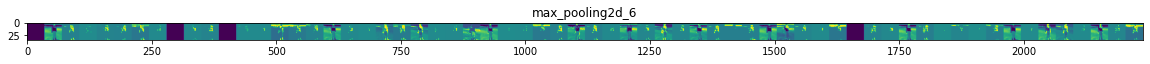

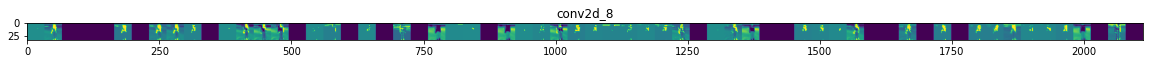

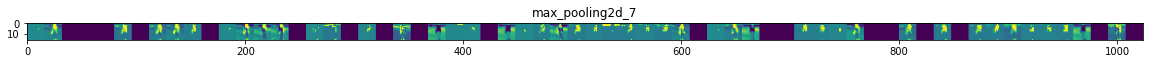

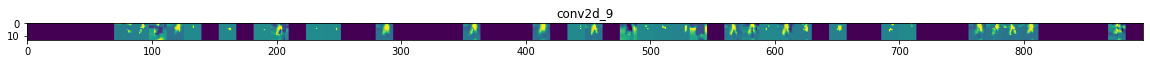

In [43]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    # This is sparsity !


**Let's clean our memory**

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)